In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv("databmi.csv")
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,Obesity
0,50,2,168,62.0,110,80,1,1,0,0,1,0,22.0,1
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.9,3
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.5,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.7,2
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68617,52,2,168,76.0,120,80,1,1,1,0,1,0,26.9,2
68618,61,1,158,126.0,140,90,2,2,0,0,1,1,50.5,3
68619,52,2,183,105.0,180,90,3,1,0,1,0,1,31.4,3
68620,61,1,163,72.0,135,80,1,2,0,0,0,1,27.1,2


In [3]:
# Explore various machine learning models
# https://scikit-learn.org/stable/supervised_learning.html

# Decision Tree
# Random Forest
# AdaBoost

In [4]:
## Train test validation split
from sklearn.model_selection import train_test_split

features = data.drop(columns = "cardio")
target = data["cardio"]

X_train, X_test_val, y_train, y_test_val = train_test_split(features, target, test_size = 0.3, random_state = 1) ## Train  ,  Test+Validation
X_test, X_val, y_test, y_val = train_test_split(X_test_val,y_test_val, test_size = 0.5, random_state = 1) ## Test and Validation




## Train dataset to fit model
## Validation dataset to select the best model
## Test dataset to use for final score

In [5]:
######################## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


Text(0.5, 1.0, 'Validation Accuracy score')

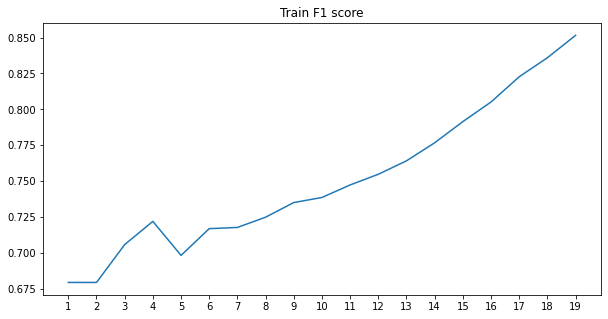

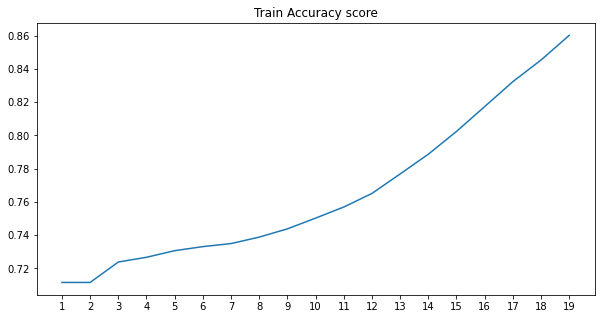

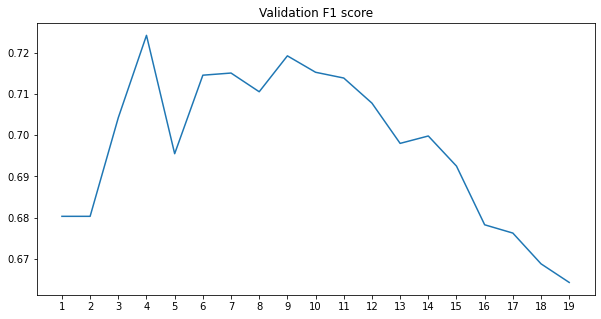

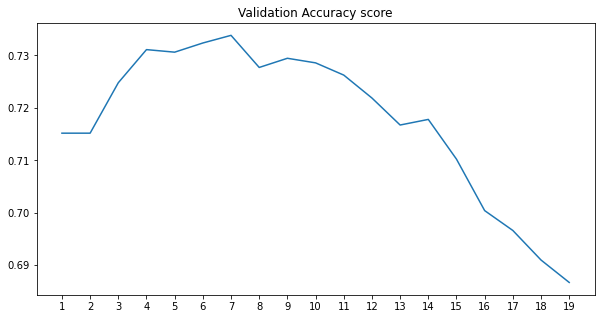

In [13]:
### See F1 score in with various max_depth

tree_train_f1 = []
tree_val_f1 = []
tree_train_acc = []
tree_val_acc = []

depth = np.arange(1,20)
for i in depth:
	tree = DecisionTreeClassifier(max_depth= i)
	tree.fit(X_train, y_train)
	tree_train_f1.append(precision_recall_fscore_support(y_train, tree.predict(X_train))[2][1])
	tree_val_f1.append(precision_recall_fscore_support(y_val, tree.predict(X_val))[2][1])
	tree_train_acc.append(tree.score(X_train, y_train))
	tree_val_acc.append(tree.score(X_val, y_val))

fig = plt.figure(figsize = (10,5))
plt.plot(depth,tree_train_f1)
plt.xticks(depth)
plt.title("Train F1 score")
fig = plt.figure(figsize = (10,5))
plt.plot(depth,tree_train_acc)
plt.xticks(depth)
plt.title("Train Accuracy score")

fig = plt.figure(figsize = (10,5))
plt.plot(depth,tree_val_f1)
plt.xticks(depth)
plt.title("Validation F1 score")
fig = plt.figure(figsize = (10,5))
plt.plot(depth,tree_val_acc)
plt.xticks(depth)
plt.title("Validation Accuracy score")


In [ ]:
### Decision Tree F1 and Accuracy score peaked at around 5-6 in the validation set. After that, the scores decrease due to overfitting

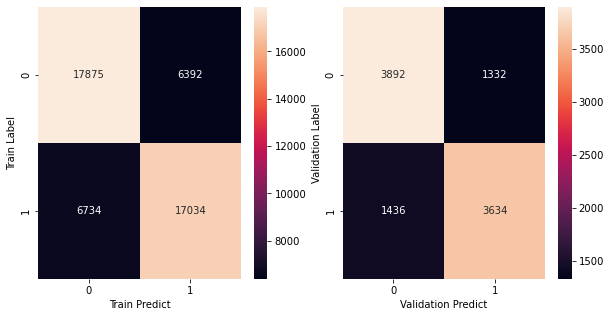

Training Accuracy:  0.7267409180805663
Training Precision:  0.7271407837445574
Training Recall:  0.7166778862335914
Training F1 score:  0.7218714243336017

Test Accuracy:  0.7311054983485525
Test Precision:  0.7317760773258155
Test Recall:  0.7167652859960553
Test F1 score:  0.7241929055400558


In [8]:
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train, y_train)

fig, axes = plt.subplots(ncols = 2, figsize = (10,5))
sb.heatmap(confusion_matrix(y_train, tree.predict(X_train)), annot = True, fmt = "0.0f", ax = axes[0])
plt.setp(axes[0], xlabel = "Train Predict")
plt.setp(axes[0], ylabel = "Train Label")
sb.heatmap(confusion_matrix(y_val, tree.predict(X_val)), annot = True, fmt = "0.0f", ax = axes[1])
plt.setp(axes[1], xlabel = "Validation Predict")
plt.setp(axes[1], ylabel = "Validation Label")

plt.show()


tree_train_prf = precision_recall_fscore_support(y_train,tree.predict(X_train))
print("Training Accuracy: ", tree.score(X_train, y_train))
print("Training Precision: ", tree_train_prf[0][1])  # label 1 precision , there is also label 0 precision
print("Training Recall: ", tree_train_prf[1][1])
print("Training F1 score: ", tree_train_prf[2][1])
print()
tree_val_prf = precision_recall_fscore_support(y_val,tree.predict(X_val))
print("Validation Accuracy: ", tree.score(X_val, y_val))
print("Validation Precision: ", tree_val_prf[0][1])  # label 1 precision , there is also label 0 precision
print("Validation Recall: ", tree_val_prf[1][1])
print("Validation F1 score: ", tree_val_prf[2][1])


Text(0.5, 1.0, 'Validation Accuracy score')

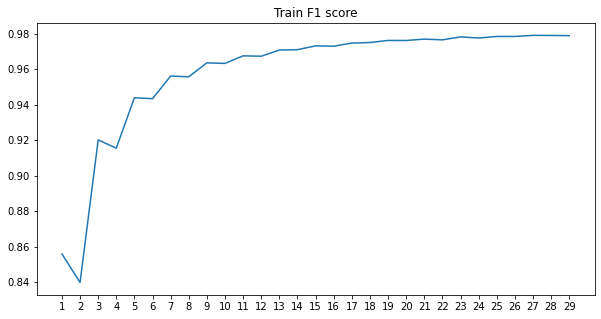

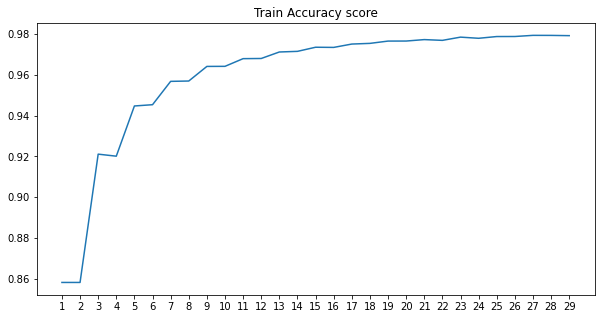

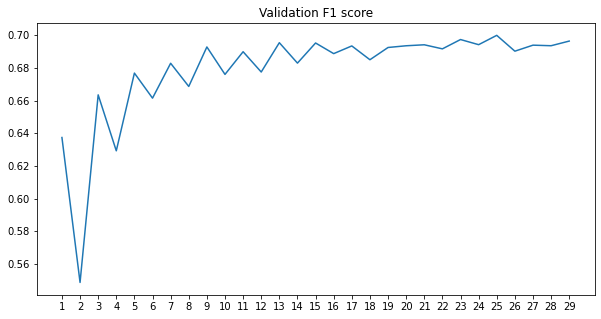

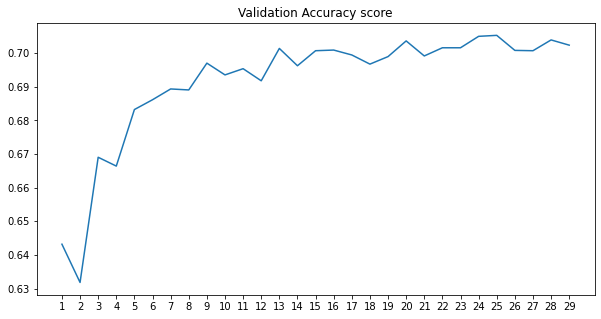

In [30]:
#### Random Forest
from sklearn.ensemble import RandomForestClassifier

forest_train_f1 = []
forest_val_f1 = []
forest_train_acc = []
forest_val_acc = []

estimator = np.arange(1,30)
for i in estimator:
	forest = RandomForestClassifier(n_estimators=i)
	forest.fit(X_train, y_train)
	forest_train_f1.append(precision_recall_fscore_support(y_train, forest.predict(X_train))[2][1])
	forest_val_f1.append(precision_recall_fscore_support(y_val, forest.predict(X_val))[2][1])
	forest_train_acc.append(forest.score(X_train, y_train))
	forest_val_acc.append(forest.score(X_val, y_val))

fig = plt.figure(figsize = (10,5))
plt.plot(estimator,forest_train_f1)
plt.xticks(estimator)
plt.title("Train F1 score")
fig = plt.figure(figsize = (10,5))
plt.plot(estimator,forest_train_acc)
plt.xticks(estimator)
plt.title("Train Accuracy score")

fig = plt.figure(figsize = (10,5))
plt.plot(estimator,forest_val_f1)
plt.xticks(estimator)
plt.title("Validation F1 score")
fig = plt.figure(figsize = (10,5))
plt.plot(estimator,forest_val_acc)
plt.xticks(estimator)
plt.title("Validation Accuracy score")
	

In [ ]:
### Random Forest accuracy and F1 in both train and validation increases as the number of estimator increases
### For validation, accuracy and F1 plateau at around 0.7
## It is not as good as Decision Tree

Text(0.5, 1.0, 'Validation Accuracy score')

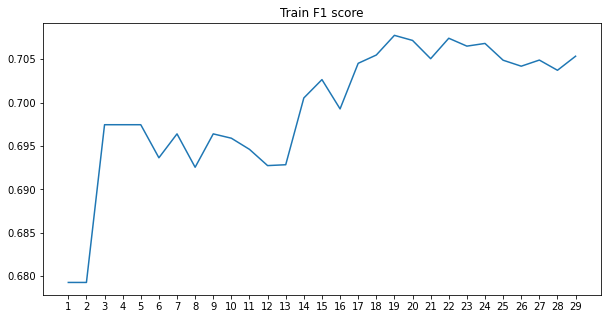

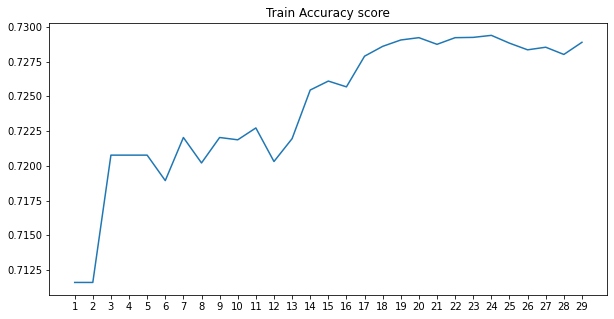

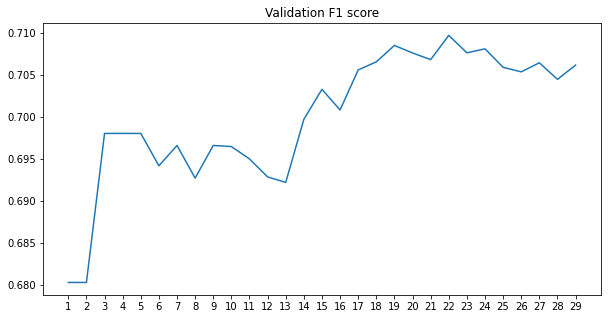

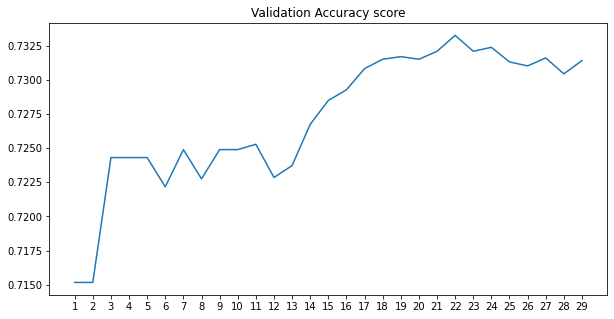

In [31]:
### Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score


ada_train_f1 = []
ada_val_f1 = []
ada_train_acc = []
ada_val_acc = []

estimator = np.arange(1,30)
for i in estimator:
	ada = AdaBoostClassifier(n_estimators=i)
	ada.fit(X_train, y_train)
	ada_train_f1.append(precision_recall_fscore_support(y_train, ada.predict(X_train))[2][1])
	ada_val_f1.append(precision_recall_fscore_support(y_val, ada.predict(X_val))[2][1])
	ada_train_acc.append(ada.score(X_train, y_train))
	ada_val_acc.append(ada.score(X_val, y_val))

fig = plt.figure(figsize = (10,5))
plt.plot(estimator,ada_train_f1)
plt.xticks(estimator)
plt.title("Train F1 score")
fig = plt.figure(figsize = (10,5))
plt.plot(estimator,ada_train_acc)
plt.xticks(estimator)
plt.title("Train Accuracy score")

fig = plt.figure(figsize = (10,5))
plt.plot(estimator,ada_val_f1)
plt.xticks(estimator)
plt.title("Validation F1 score")
fig = plt.figure(figsize = (10,5))
plt.plot(estimator,ada_val_acc)
plt.xticks(estimator)
plt.title("Validation Accuracy score")


In [ ]:
## Adaboost 
## Validation accuracy and F1 score peaked at around 22. F1 = 0.71, Accuracy = 0.73
## Comparable to Decision Tree


Train Accuracy:  0.9790153013427709
Train F1 score:  0.9786765950245387

Validate Accuracy:  0.70312803574898
Validate F1 score:  0.697065820777161

Test Accuracy:  0.703487807247644
Test F1 score:  0.6987166831194471


In [26]:
### Try Test set on Decision Tree max depth = 4

tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train, y_train)

tree_train = precision_recall_fscore_support(y_train,tree.predict(X_train))
print("Train Accuracy: ", tree.score(X_train, y_train))
print("Train F1 score: ", tree_train[2][1])
print()
tree_test = precision_recall_fscore_support(y_test,tree.predict(X_test))
print("Test Accuracy: ", tree.score(X_test, y_test))
print("Test F1 score: ", tree_test[2][1])

Train Accuracy:  0.7267409180805663
Train F1 score:  0.7218714243336017

Test Accuracy:  0.7340911298941027
Test F1 score:  0.7288219558109581


In [32]:
### Try Test set on AdaBoost   n_estimators = 22

ada = AdaBoostClassifier(n_estimators=22)
ada.fit(X_train, y_train)

ada_train = precision_recall_fscore_support(y_train,ada.predict(X_train))
print("Train Accuracy: ", ada.score(X_train, y_train))
print("Train F1 score: ", ada_train[2][1])
print()
ada_test = precision_recall_fscore_support(y_test,ada.predict(X_test))
print("Test Accuracy: ", ada.score(X_test, y_test))
print("Test F1 score: ", ada_test[2][1])

Train Accuracy:  0.7292182783387113
Train F1 score:  0.7074119896524574

Test Accuracy:  0.7353541241620519
Test F1 score:  0.7135044173327725


In [ ]:
### Decision Tree seemed to be better 

### => Choose Decision Tree as our final Model